In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np



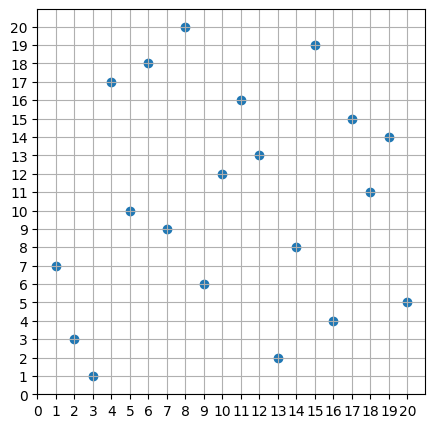

In [2]:
#helper image
pi =  [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

x = range(1,21)

# initialize figure
fig, fig = plt.subplots(figsize=(5, 5))
    
plt.scatter(x,pi)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,21))
fig.set_yticks(range(0,21))
plt.grid(True)

<img src="tree.jpeg" alt="AVL Tree for pi" style="width: 700px;"/>

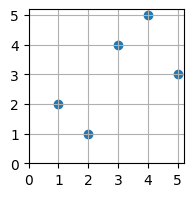

In [3]:
#small helper image
pi =  [2, 1, 4, 5, 3]
x = range(1,6)

# initialize figure
fig, fig = plt.subplots(figsize=(2, 2))
    
plt.scatter(x,pi)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,6))
fig.set_yticks(range(0,6))
plt.grid(True)

<img src="small_tree.jpeg" alt="AVL Tree for pi" style="width: 200px;"/>

In [4]:
class Node(): 
    def __init__(self, val): 
        self.val = val 
        self.left = None
        self.right = None
        self.height = 1
  
class AVL_Tree(): 
    def insert(self, node, val): 
        if not node: 
            return Node(val) 
        elif val < node.val: 
            node.left = self.insert(node.left, val) 
        else: 
            node.right = self.insert(node.right, val) 
  
        node.height = 1 + max(self.height(node.left), 
                           self.height(node.right)) 
  
        balanced = self.balance(node) 

        # single right rotate
        if balanced > 1 and val < node.left.val: 
            return self.rightRotate(node) 

        # single left rotate
        if balanced < -1 and val > node.right.val: 
            return self.leftRotate(node) 
        
        # double right rotate
        if balanced > 1 and val > node.left.val: 
            node.left = self.leftRotate(node.left) 
            return self.rightRotate(node) 

        # double left rotate
        if balanced < -1 and val < node.right.val: 
            node.right = self.rightRotate(node.right) 
            return self.leftRotate(node) 

        return node 
  
    def leftRotate(self, node): 
        right_child = node.right 
        t = right_child.left 
  
        right_child.left = node 
        node.right = t 
  
        node.height = 1 + max(self.height(node.left), self.height(node.right)) 
        right_child.height = 1 + max(self.height(right_child.left), self.height(right_child.right)) 
  
        return right_child 
  
    def rightRotate(self, node): 
        left_child = node.left 
        t = left_child.right 
  
        left_child.right = node 
        node.left = t 
  
        node.height = 1 + max(self.height(node.left), self.height(node.right)) 
        left_child.height = 1 + max(self.height(left_child.left), self.height(left_child.right)) 
        
        return left_child 
  
    def height(self, node): 
        if not node: 
            return 0
        return node.height 
  
    def balance(self, node): 
        if not node: 
            return 0
        return self.height(node.left) - self.height(node.right) 
    
    def preOrder(self, root):

        def preO(root): 
            if not root: 
                return
            print(root.val, end=" ") 
            preO(root.left) 
            preO(root.right) 

        preO(root)
        print()
        

pi = [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

pi_short = [2, 1, 4, 5, 3]

pi_increasing = [x for x in range(1, 6)] # 1, 2, 3, 4, 5

t = AVL_Tree()
root = None

for m in pi_increasing:
    root = t.insert(root, m)

t.preOrder(root)

root = None

for m in pi:
    root = t.insert(root, m)

t.preOrder(root)



2 1 4 3 5 
10 3 1 2 7 5 4 6 9 8 16 13 12 11 15 14 18 17 20 19 


#### Small Simulation

Simulating AVL tree creation on `pi_increasing`, 1 starts as the root. Then 2 is inserted as the right child of 1. Then 3 is inserted as the right child of 2. But now with 1 being the root, the left side has height 0 and the right side has height 2. Therefore, balanced = -2 and a left rotate is performed. Now the root is 2 with 1 as its left child and 3 as its right child. Then 4 is inserted as the right child of 3. Then 5 is inserted as the right child of 4 and a left rotate is performed on node 3.

### Augmented Binary Search Tree

note: needs split and concatenate for avl trees when splitting $Q^{*}$  $Q_{\alpha}$, also balance from the last implementation, also pointer to parent, also max?
and also SPLIT and CONCATENATE. also figure out when insertion happens. and make sure is actually balanced.

Read section 8 and 9 again

height should probably be changed to be part of a node and not a rerunning function every time

In [5]:
class Node(): 
    def __init__(self, val, internal=False): 
        self.val = val
        self.f = None
        self.left = None
        self.right = None
        if not internal:
            self.q = Node(val, True)
  
class Augmented_Tree(): 
    def insert(self, node, val, parent=None): 
        if not node: 
            new_node = Node(val)
            new_node.f = parent
            return new_node
        elif val < node.val: 
            node.left = self.insert(node.left, val, node) 
        else: 
            node.right = self.insert(node.right, val, node) 

        node = self.balance(node)

        return node 
    
    def avlsplit(self, node, k):
        if not node: 
            return None, False, None
        l, m, r = node.left, node.val, node.right
        if k == m:
            new_l = Node(m)
            new_l.left = l
            if l:
                l.f = new_l
            r.f = None
            return self.balance(new_l), True, r
        if k < m:
            lprime, b, rprime = self.avlsplit(l, k)
            return lprime, b, self.avljoin(rprime, m, r)
        if k > m:
            lprime, b, rprime = self.avlsplit(r, k)
            return self.avljoin(l, m, lprime), b, rprime

    def avlrightjoin(self, left, k, right):
        l, kprime, c = left.left, left.val, left.right
        if self.height(c) <= self.height(right) + 1:
            tprime = Node(k)
            tprime.left = c
            if c:
                c.f = tprime
            tprime.right = right
            if right:
                right.f = tprime
            if self.height(tprime) <= self.height(l) + 1:
                return_node = Node(kprime)
                return_node.left = l
                if l:
                    l.f = return_node
                return_node.right = tprime
                if tprime:
                    tprime.f = return_node
                return return_node
            else: 
                return_node = Node(kprime)
                return_node.left = l
                if l:
                    l.f = return_node
                return_node.right = self.rightRotate(tprime)
                return self.leftRotate(return_node)
        else:
            tprime = self.avlrightjoin(c, k, right)
            tprimeprime = Node(kprime)
            tprimeprime.left = l
            if l:
                l.f = tprimeprime
            tprimeprime.right = tprime
            if tprime:
                tprime.f = tprimeprime
            if self.height(tprime) <= self.height(l) + 1:
                return tprimeprime
            else:
                return self.leftRotate(tprimeprime)
            
    def avlleftjoin(self, left, k, right):
        c, kprime, r = right.left, right.val, right.right
        if self.height(c) <= self.height(left) + 1:
            tprime = Node(k)
            tprime.left = left
            if left:
                left.f = tprime
            tprime.right = c
            if c:
                c.f = tprime
            if self.height(tprime) <= self.height(r) + 1:
                return_node = Node(kprime)
                return_node.left = tprime
                if tprime:
                    tprime.f = return_node
                return_node.right = r
                if r:
                    r.f = return_node
                return return_node
            else:
                return_node = Node(kprime)
                return_node.left = self.leftRotate(tprime)
                return_node.right = r
                if r:
                    r.f = return_node
                return self.rightRotate(return_node)
        else:
            tprime = self.avlleftjoin(left, k, c)
            tprimeprime = Node(kprime)
            tprimeprime.left = tprime
            if tprime:
                tprime.f = tprimeprime
            tprimeprime.right = r
            if r:
                r.f = tprimeprime
            if self.height(tprime) <= self.height(r) + 1:
                return tprimeprime
            else:
                return self.rightRotate(tprimeprime)

    # requires that k > all elements in left and k < all elements in right
    def avljoin(self, left, k, right):
        if self.height(left) > self.height(right) + 1:
            return self.avlrightjoin(left, k, right)
        if self.height(right) > self.height(left) + 1:
            return self.avlleftjoin(left, k, right)
        return_node = Node(k)
        return_node.left = left
        if left:
            left.f = return_node
        return_node.right = right
        if right:
            right.f = return_node
        return return_node
    
    def avlunion(self, node1, node2):
        if not node1:
            return node2
        if not node2:
            return node1
        tless, b, tgreater = self.avlsplit(node2, node1.val)
        return self.avljoin(self.avlunion(node1.left, tless), node1.val, self.avlunion(node1.right, tgreater))

    def split(self):
        pass

    def concatenate(self):
        pass

    def down(self, a, b):
        if a.val == b.val:
            return a
        else:
            q1, q2 = self.avlsplit(a.q, a.b)
            a.left.q = self.avlunion(a.left.q, q1)
            a.right.q = self.avlunion(a.right.q, q2)
            if b.val < a.val:
                self.down(a.left, b)
            else:
                self.down(a.right, b)

    def up(self, a):
        pass

    def balance(self, node):
        balanced = self.height(node.left) - self.height(node.right) 

        # single right rotate
        if balanced > 1 and val < node.left.val: 
            return self.rightRotate(node) 

        # single left rotate
        if balanced < -1 and val > node.right.val: 
            return self.leftRotate(node) 
        
        # double right rotate
        if balanced > 1 and val > node.left.val: 
            node.left = self.leftRotate(node.left) 
            return self.rightRotate(node) 

        # double left rotate
        if balanced < -1 and val < node.right.val: 
            node.right = self.rightRotate(node.right) 
            return self.leftRotate(node) 
        
        return node

    def height(self, node):
        if not node:
            return 0
        return 1 + max(self.height(node.left), self.height(node.right))
    
    def leftRotate(self, node): 
        tmp = node.right
        node.right = tmp.left
        if tmp.left:
            tmp.left.f = node
        tmp.left = node
        tmp.f = node.f
        node.f = tmp
        if tmp.f:
            if node.val < tmp.f.val:
                tmp.f.left = tmp
            else:
                tmp.f.right = tmp
        return tmp
  
    def rightRotate(self, node): 
        tmp = node.left
        node.left = tmp.right
        if tmp.right:
            tmp.right.f = node
        tmp.right = node
        tmp.f = node.f
        node.f = tmp
        if tmp.f:
            if node.val < tmp.f.val:
                tmp.f.left = tmp
            else:
                tmp.f.right = tmp
        return tmp

    def preOrder(self, root):
        def preO(node): 
            if not node: 
                return
            print(f'Node: {node.val}, Parent: {node.f.val if node.f else None}') 
            preO(node.left) 
            preO(node.right)
        preO(root)
        print()
  

# pi = [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

# pi_short = [2, 1, 4, 5, 3]

pi_increasing1 = [x for x in range(1, 6)] # 1, 2, 3, 4, 5
pi_increasing2 = [x for x in range(6, 8)] # 6, 7

t = Augmented_Tree()
root1 = None
for val in pi_increasing1:
    root1 = t.insert(root1, val)
t.preOrder(root1)

root2 = None
for val in pi_increasing2:
    root2 = t.insert(root2, val)
t.preOrder(root2)

root3 = t.avlunion(root1, root2)
t.preOrder(root3)

root4, n, root5 = t.avlsplit(root3, 4)
t.preOrder(root4)
t.preOrder(root5)

root6 = t.avlunion(root4, root5)
t.preOrder(root6)



Node: 2, Parent: None
Node: 1, Parent: 2
Node: 4, Parent: 2
Node: 3, Parent: 4
Node: 5, Parent: 4

Node: 6, Parent: None
Node: 7, Parent: 6

Node: 4, Parent: None
Node: 2, Parent: 4
Node: 1, Parent: 2
Node: 3, Parent: 2
Node: 6, Parent: 4
Node: 5, Parent: 6
Node: 7, Parent: 6

Node: 3, Parent: None
Node: 2, Parent: 3
Node: 1, Parent: 2
Node: 4, Parent: 3

Node: 6, Parent: None
Node: 5, Parent: 6
Node: 7, Parent: 6

Node: 3, Parent: None
Node: 2, Parent: 3
Node: 1, Parent: 2
Node: 6, Parent: 3
Node: 4, Parent: 6
Node: 5, Parent: 4
Node: 7, Parent: 6

